In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential

/home/ranojoy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
current_location = os.getcwd()
data_location = "data/"

In [3]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [4]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [5]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [6]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [7]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


In [8]:
input_ = []
target_ = []

input_size = 6

for k in range(len(data_prep)):
    for m in range(10 - input_size):
        input_.append(data_prep[k][m:input_size + m])
        target_.append(data_prep[k][input_size + m])

In [9]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k] - 1] = 1
    target.append(a)

In [10]:
print (input_[0], target[0])
print (len(input_))

[1, 3, 2, 2, 3, 3] [1, 0, 0]
328


In [11]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [12]:
print (trainX[0], trainY[0], input_[0])

[1 3 2 2 3 3] [1 0 0] [1, 3, 2, 2, 3, 3]


In [13]:
model = Sequential()

model.add(Dense(len(trainX[0]), input_dim = len(trainX[0]), activation='relu', kernel_initializer='normal'))
model.add(Dense(50, activation='relu', kernel_initializer='normal'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(trainX, trainY, epochs=250, batch_size=50, verbose=1, validation_data = (validateX, validateY), shuffle = True)

Train on 196 samples, validate on 66 samples
Epoch 1/250
196/196 [==============================] - 1s 3ms/step - loss: 1.0990 - acc: 0.3163 - val_loss: 1.0977 - val_acc: 0.4242
Epoch 2/250
196/196 [==============================] - 0s 138us/step - loss: 1.0983 - acc: 0.3520 - val_loss: 1.0971 - val_acc: 0.4242
Epoch 3/250
196/196 [==============================] - 0s 152us/step - loss: 1.0980 - acc: 0.3571 - val_loss: 1.0964 - val_acc: 0.4242
Epoch 4/250
196/196 [==============================] - 0s 136us/step - loss: 1.0977 - acc: 0.3571 - val_loss: 1.0955 - val_acc: 0.4242
Epoch 5/250
196/196 [==============================] - 0s 140us/step - loss: 1.0974 - acc: 0.3571 - val_loss: 1.0946 - val_acc: 0.4242
Epoch 6/250
196/196 [==============================] - 0s 124us/step - loss: 1.0970 - acc: 0.3571 - val_loss: 1.0938 - val_acc: 0.4242
Epoch 7/250
196/196 [==============================] - 0s 122us/step - loss: 1.0965 - acc: 0.3571 - val_loss: 1.0932 - val_acc: 0.4242
Epoch 8/250


196/196 [==============================] - 0s 149us/step - loss: 0.9799 - acc: 0.4847 - val_loss: 0.9395 - val_acc: 0.6667
Epoch 62/250
196/196 [==============================] - 0s 143us/step - loss: 0.9794 - acc: 0.5102 - val_loss: 0.9387 - val_acc: 0.6667
Epoch 63/250
196/196 [==============================] - 0s 105us/step - loss: 0.9783 - acc: 0.5204 - val_loss: 0.9384 - val_acc: 0.6515
Epoch 64/250
196/196 [==============================] - 0s 139us/step - loss: 0.9770 - acc: 0.5204 - val_loss: 0.9355 - val_acc: 0.6667
Epoch 65/250
196/196 [==============================] - 0s 98us/step - loss: 0.9775 - acc: 0.4898 - val_loss: 0.9342 - val_acc: 0.6515
Epoch 66/250
196/196 [==============================] - 0s 97us/step - loss: 0.9754 - acc: 0.5000 - val_loss: 0.9338 - val_acc: 0.6667
Epoch 67/250
196/196 [==============================] - 0s 148us/step - loss: 0.9745 - acc: 0.5255 - val_loss: 0.9331 - val_acc: 0.6515
Epoch 68/250
196/196 [==============================] - 0s 132u

196/196 [==============================] - 0s 115us/step - loss: 0.9614 - acc: 0.5000 - val_loss: 0.9110 - val_acc: 0.6667
Epoch 122/250
196/196 [==============================] - 0s 133us/step - loss: 0.9625 - acc: 0.5000 - val_loss: 0.9108 - val_acc: 0.6667
Epoch 123/250
196/196 [==============================] - 0s 75us/step - loss: 0.9630 - acc: 0.5051 - val_loss: 0.9118 - val_acc: 0.6364
Epoch 124/250
196/196 [==============================] - 0s 130us/step - loss: 0.9617 - acc: 0.5000 - val_loss: 0.9113 - val_acc: 0.6667
Epoch 125/250
196/196 [==============================] - 0s 99us/step - loss: 0.9606 - acc: 0.5000 - val_loss: 0.9113 - val_acc: 0.6667
Epoch 126/250
196/196 [==============================] - 0s 138us/step - loss: 0.9610 - acc: 0.5000 - val_loss: 0.9106 - val_acc: 0.6667
Epoch 127/250
196/196 [==============================] - 0s 121us/step - loss: 0.9605 - acc: 0.4949 - val_loss: 0.9101 - val_acc: 0.6667
Epoch 128/250
196/196 [==============================] - 

196/196 [==============================] - 0s 93us/step - loss: 0.9568 - acc: 0.5000 - val_loss: 0.9076 - val_acc: 0.6667
Epoch 182/250
196/196 [==============================] - 0s 112us/step - loss: 0.9566 - acc: 0.5000 - val_loss: 0.9064 - val_acc: 0.6667
Epoch 183/250
196/196 [==============================] - 0s 95us/step - loss: 0.9579 - acc: 0.5000 - val_loss: 0.9071 - val_acc: 0.6667
Epoch 184/250
196/196 [==============================] - 0s 134us/step - loss: 0.9562 - acc: 0.5051 - val_loss: 0.9062 - val_acc: 0.6667
Epoch 185/250
196/196 [==============================] - 0s 174us/step - loss: 0.9564 - acc: 0.5000 - val_loss: 0.9057 - val_acc: 0.6667
Epoch 186/250
196/196 [==============================] - 0s 105us/step - loss: 0.9562 - acc: 0.5000 - val_loss: 0.9052 - val_acc: 0.6667
Epoch 187/250
196/196 [==============================] - 0s 79us/step - loss: 0.9574 - acc: 0.4949 - val_loss: 0.9046 - val_acc: 0.6667
Epoch 188/250
196/196 [==============================] - 0

196/196 [==============================] - 0s 195us/step - loss: 0.9556 - acc: 0.4898 - val_loss: 0.9030 - val_acc: 0.6667
Epoch 242/250
196/196 [==============================] - 0s 162us/step - loss: 0.9540 - acc: 0.5000 - val_loss: 0.9062 - val_acc: 0.6818
Epoch 243/250
196/196 [==============================] - 0s 107us/step - loss: 0.9540 - acc: 0.5051 - val_loss: 0.9089 - val_acc: 0.6818
Epoch 244/250
196/196 [==============================] - 0s 127us/step - loss: 0.9540 - acc: 0.5153 - val_loss: 0.9084 - val_acc: 0.6818
Epoch 245/250
196/196 [==============================] - 0s 103us/step - loss: 0.9538 - acc: 0.5051 - val_loss: 0.9069 - val_acc: 0.6667
Epoch 246/250
196/196 [==============================] - 0s 116us/step - loss: 0.9536 - acc: 0.5000 - val_loss: 0.9069 - val_acc: 0.6818
Epoch 247/250
196/196 [==============================] - 0s 151us/step - loss: 0.9536 - acc: 0.5000 - val_loss: 0.9051 - val_acc: 0.6667
Epoch 248/250
196/196 [==============================] 

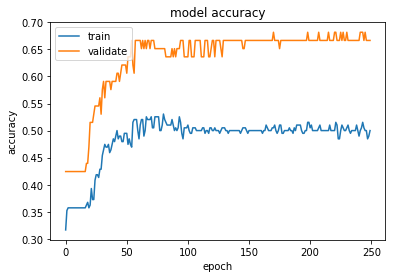

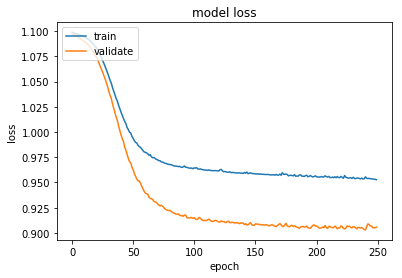

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [17]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

196/196 [==============================] - 0s 203us/step
Train acc: 50.00%
66/66 [==============================] - 0s 187us/step
Train acc: 66.67%
66/66 [==============================] - 0s 187us/step
Train acc: 57.58%


In [18]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 1, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 1, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 1, 0]
[0, 1, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0

In [19]:
sequence = ['A', 'C', 'A', 'B', 'C', 'B']

sqd = []
for k in range(len(sequence)):
    sqd.append(ord(sequence[k]) - ord('A') + 1)

predictions = model.predict(np.array([sqd])) 

a = [0]*3
maxx = max(predictions[0])
pos = 0
for m in range(len(predictions[0])):
    if predictions[0][m] == maxx:
        pos = m
        break
a[pos] = 1

print (sqd, a)

if a[0] == 1:
    print ('A')
elif a[1] == 1:
    print ('B')
else:
    print ('C')

[1, 3, 1, 2, 3, 2] [1, 0, 0]
A


In [20]:
model_json = model.to_json()
with open("model/model_7th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_7th.h5")
print("Saved model to disk")

Saved model to disk
